# Read mbd_dataset

In [58]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [160]:
#!pip install access_parser

In [83]:
!dir v1

 Volume in drive C is Windows-SSD
 Volume Serial Number is C4CE-7D5D

 Directory of c:\Documents\MsC_ITU\4th_semester_MSc_ITU\Master_Thesis\Thesis_Rep_similarity\WIP\FACED_Dataset\v1

03/26/2025  04:49 PM    <DIR>          .
03/26/2025  01:32 PM    <DIR>          ..
03/26/2025  01:32 PM             2,289 cache_info.json
03/26/2025  01:34 PM     7,329,546,240 data.mdb
03/26/2025  01:32 PM               616 processing_pipe.txt
03/26/2025  01:34 PM        27,007,091 sample_metadata.tsv
               4 File(s)  7,356,556,236 bytes
               2 Dir(s)  55,889,879,040 bytes free


In [157]:
import pandas as pd
import numpy as np
import torch

from torcheeg.io.eeg_signal import EEGSignalIO

## Path to dir with data (remember the last '/')
#path = "/eeg_data/BNCI2014-001/"
path = "C:/Documents/MsC_ITU/4th_semester_MSc_ITU/Master_Thesis/Thesis_Rep_similarity/WIP/FACED_Dataset/v1/"

## Establish connection to datafile
IO = EEGSignalIO(io_path=str(path), io_mode='lmdb')

## Read metadata dataframe
metadata = pd.read_csv(path + 'sample_metadata.tsv', sep='\t')

idxs = np.arange(len(metadata))

eeg = torch.FloatTensor(np.array([IO.read_eeg(str(i)) for i in idxs]))
print(eeg.shape)

torch.Size([111762, 32, 400])


ValueError: Must pass 2-d input. shape=(111762, 32, 400)

In [161]:
sample_meta = pd.read_csv("v1/sample_metadata.tsv", sep ="\t")
sample_meta

,onset,duration,video,stim_valence,emotion,subject,session,run,trial,joy,...,amusement,anger,disgust,fear,sadness,arousal,valence,familiarity,liking,window_idx
0,490,2,11,negative,sadness,0,0,0,1,0.162496,...,0.008545,0.018030,0.059074,0.031417,6.590869,4.433903,0.865629,0.017004,0.028369,0
1,492,2,11,negative,sadness,0,0,0,1,0.162496,...,0.008545,0.018030,0.059074,0.031417,6.590869,4.433903,0.865629,0.017004,0.028369,1
2,494,2,11,negative,sadness,0,0,0,1,0.162496,...,0.008545,0.018030,0.059074,0.031417,6.590869,4.433903,0.865629,0.017004,0.028369,2
3,496,2,11,negative,sadness,0,0,0,1,0.162496,...,0.008545,0.018030,0.059074,0.031417,6.590869,4.433903,0.865629,0.017004,0.028369,3
4,498,2,11,negative,sadness,0,0,0,1,0.162496,...,0.008545,0.018030,0.059074,0.031417,6.590869,4.433903,0.865629,0.017004,0.028369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111757,3566,2,26,positive,tenderness,122,0,0,28,6.788542,...,6.730208,0.167708,0.094792,0.029167,0.043750,6.737500,6.868750,7.000000,6.905208,26
111758,3568,2,26,positive,tenderness,122,0,0,28,6.788542,...,6.730208,0.167708,0.094792,0.029167,0.043750,6.737500,6.868750,7.000000,6.905208,27
111759,3570,2,26,positive,tenderness,122,0,0,28,6.788542,...,6.730208,0.167708,0.094792,0.029167,0.043750,6.737500,6.868750,7.000000,6.905208,28
111760,3572,2,26,positive,tenderness,122,0,0,28,6.788542,...,6.730208,0.167708,0.094792,0.029167,0.043750,6.737500,6.868750,7.000000,6.905208,29


In [107]:
sample_meta = pd.read_csv("v1/sample_metadata.tsv", sep ="\t")

newdf = sample_meta.sort_values("arousal")
newdf

,onset,duration,video,stim_valence,emotion,subject,session,run,trial,joy,...,amusement,anger,disgust,fear,sadness,arousal,valence,familiarity,liking,window_idx
27274,646,2,20,positive,inspiration,30,0,0,2,3.666683,...,0.007178,0.031274,0.026860,0.019055,0.024154,0.0,3.479179,0.009770,3.326880,26
107031,3275,2,9,negative,fear,117,0,0,23,0.065625,...,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,21
107032,3277,2,9,negative,fear,117,0,0,23,0.065625,...,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,22
107033,3279,2,9,negative,fear,117,0,0,23,0.065625,...,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,23
107034,3281,2,9,negative,fear,117,0,0,23,0.065625,...,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75447,4061,2,6,negative,disgust,82,0,0,28,0.087500,...,0.051042,5.512500,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,31
75448,4063,2,6,negative,disgust,82,0,0,28,0.087500,...,0.051042,5.512500,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,32
75449,4065,2,6,negative,disgust,82,0,0,28,0.087500,...,0.051042,5.512500,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,33
92370,2184,2,1,negative,anger,101,0,0,16,0.408333,...,0.262500,6.504167,6.846875,6.919792,6.832292,7.0,6.737500,0.714583,1.414583,16


In [109]:
#print(set(newdf["emotion"].values))
#print(set(newdf["stim_valence"].values))
# Example DataFrame



# Define mappings
emotion_mapping = {
    'sadness': 0, 'tenderness': 1, 'anger': 2, 'amusement': 3, 'joy': 4,
    'fear': 5, 'neutral': 6, 'disgust': 7, 'inspiration': 8
}

stim_valence_mapping = {
    'negative': 0, 'neutral': 1, 'positive': 2
}

# Apply mappings
newdf["emotion_encoded"] = newdf["emotion"].map(emotion_mapping)
newdf["stim_valence_encoded"] = newdf["stim_valence"].map(stim_valence_mapping)

# Print result
newdf


,onset,duration,video,stim_valence,emotion,subject,session,run,trial,joy,...,disgust,fear,sadness,arousal,valence,familiarity,liking,window_idx,emotion_encoded,stim_valence_encoded
27274,646,2,20,positive,inspiration,30,0,0,2,3.666683,...,0.026860,0.019055,0.024154,0.0,3.479179,0.009770,3.326880,26,8,2
107031,3275,2,9,negative,fear,117,0,0,23,0.065625,...,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,21,5,0
107032,3277,2,9,negative,fear,117,0,0,23,0.065625,...,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,22,5,0
107033,3279,2,9,negative,fear,117,0,0,23,0.065625,...,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,23,5,0
107034,3281,2,9,negative,fear,117,0,0,23,0.065625,...,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,24,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75447,4061,2,6,negative,disgust,82,0,0,28,0.087500,...,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,31,7,0
75448,4063,2,6,negative,disgust,82,0,0,28,0.087500,...,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,32,7,0
75449,4065,2,6,negative,disgust,82,0,0,28,0.087500,...,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,33,7,0
92370,2184,2,1,negative,anger,101,0,0,16,0.408333,...,6.846875,6.919792,6.832292,7.0,6.737500,0.714583,1.414583,16,2,0


In [ ]:
newdf.shape[0]/3
class_1 = newdf[0:37254]
class_2 = newdf[37254:37254*2]
class_3 = newdf[37254*2:]


,onset,duration,video,stim_valence,emotion,subject,session,run,trial,joy,...,disgust,fear,sadness,arousal,valence,familiarity,liking,window_idx,emotion_encoded,stim_valence_encoded
60671,3358,2,18,positive,amusement,66,0,0,21,6.088542,...,0.021875,0.058333,0.036458,4.557292,5.760417,6.015625,6.321875,19,3,2
60672,3360,2,18,positive,amusement,66,0,0,21,6.088542,...,0.021875,0.058333,0.036458,4.557292,5.760417,6.015625,6.321875,20,3,2
60673,3362,2,18,positive,amusement,66,0,0,21,6.088542,...,0.021875,0.058333,0.036458,4.557292,5.760417,6.015625,6.321875,21,3,2
60674,3364,2,18,positive,amusement,66,0,0,21,6.088542,...,0.021875,0.058333,0.036458,4.557292,5.760417,6.015625,6.321875,22,3,2
60675,3366,2,18,positive,amusement,66,0,0,21,6.088542,...,0.021875,0.058333,0.036458,4.557292,5.760417,6.015625,6.321875,23,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75447,4061,2,6,negative,disgust,82,0,0,28,0.087500,...,7.000000,6.985417,0.021875,7.000000,0.109062,0.160103,0.058020,31,7,0
75448,4063,2,6,negative,disgust,82,0,0,28,0.087500,...,7.000000,6.985417,0.021875,7.000000,0.109062,0.160103,0.058020,32,7,0
75449,4065,2,6,negative,disgust,82,0,0,28,0.087500,...,7.000000,6.985417,0.021875,7.000000,0.109062,0.160103,0.058020,33,7,0
92370,2184,2,1,negative,anger,101,0,0,16,0.408333,...,6.846875,6.919792,6.832292,7.000000,6.737500,0.714583,1.414583,16,2,0


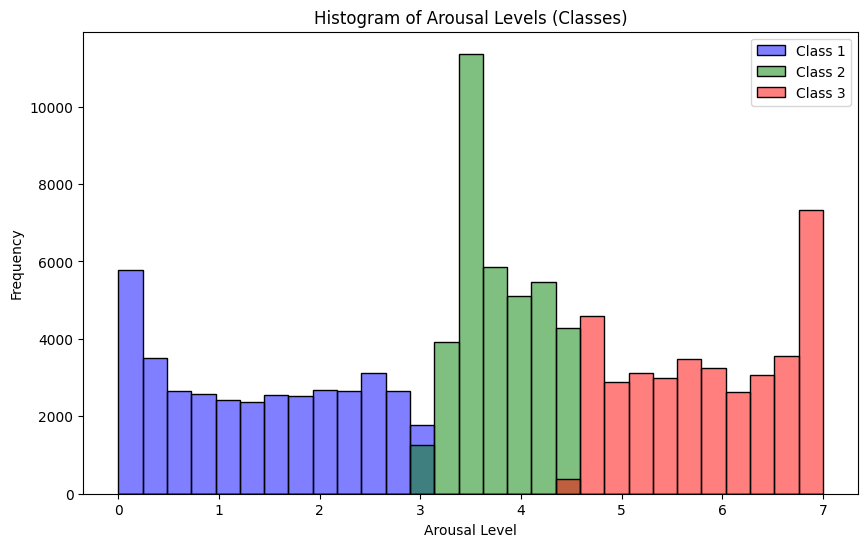

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Split the dataset into three equal parts
split_size = newdf.shape[0] // 3
class_1 = newdf.iloc[:split_size]
class_2 = newdf.iloc[split_size:split_size*2]
class_3 = newdf.iloc[split_size*2:]

# Define equal bin edges based on the global min/max of arousal
arousal_min = newdf["arousal"].min()
arousal_max = newdf["arousal"].max()
bin_edges = np.linspace(arousal_min, arousal_max, num=30)  # Adjust num for bin count

# Plot histograms with the same bin edges
plt.figure(figsize=(10, 6))

sns.histplot(class_1["arousal"], bins=bin_edges, color='blue', alpha=0.5, label="Class 1")
sns.histplot(class_2["arousal"], bins=bin_edges, color='green', alpha=0.5, label="Class 2")
sns.histplot(class_3["arousal"], bins=bin_edges, color='red', alpha=0.5, label="Class 3")

# Formatting
plt.xlabel("Arousal Level")
plt.ylabel("Frequency")
plt.title("Histogram of Arousal Levels (Classes)")
plt.legend()
plt.show()


In [123]:
newdf

,onset,duration,video,stim_valence,emotion,subject,session,run,trial,joy,...,disgust,fear,sadness,arousal,valence,familiarity,liking,window_idx,emotion_encoded,stim_valence_encoded
27274,646,2,20,positive,inspiration,30,0,0,2,3.666683,...,0.026860,0.019055,0.024154,0.0,3.479179,0.009770,3.326880,26,8,2
107031,3275,2,9,negative,fear,117,0,0,23,0.065625,...,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,21,5,0
107032,3277,2,9,negative,fear,117,0,0,23,0.065625,...,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,22,5,0
107033,3279,2,9,negative,fear,117,0,0,23,0.065625,...,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,23,5,0
107034,3281,2,9,negative,fear,117,0,0,23,0.065625,...,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,24,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75447,4061,2,6,negative,disgust,82,0,0,28,0.087500,...,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,31,7,0
75448,4063,2,6,negative,disgust,82,0,0,28,0.087500,...,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,32,7,0
75449,4065,2,6,negative,disgust,82,0,0,28,0.087500,...,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,33,7,0
92370,2184,2,1,negative,anger,101,0,0,16,0.408333,...,6.846875,6.919792,6.832292,7.0,6.737500,0.714583,1.414583,16,2,0


In [124]:
newdf.columns

Index(['onset', 'duration', 'video', 'stim_valence', 'emotion', 'subject',
       'session', 'run', 'trial', 'joy', 'tenderness', 'inspiration',
       'amusement', 'anger', 'disgust', 'fear', 'sadness', 'arousal',
       'valence', 'familiarity', 'liking', 'window_idx', 'emotion_encoded',
       'stim_valence_encoded'],
      dtype='object')

In [130]:
kept_newdf = newdf[["joy", "tenderness", "inspiration", "amusement", "anger", "disgust", "fear", "sadness", 
                    "arousal", "valence", "familiarity", "liking", "emotion_encoded", "stim_valence_encoded"]]

kept_newdf

,joy,tenderness,inspiration,amusement,anger,disgust,fear,sadness,arousal,valence,familiarity,liking,emotion_encoded,stim_valence_encoded
27274,3.666683,0.025663,3.615470,0.007178,0.031274,0.026860,0.019055,0.024154,0.0,3.479179,0.009770,3.326880,8,2
107031,0.065625,0.021875,0.000000,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,5,0
107032,0.065625,0.021875,0.000000,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,5,0
107033,0.065625,0.021875,0.000000,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,5,0
107034,0.065625,0.021875,0.000000,0.000000,1.400000,6.992708,6.992708,7.000000,0.0,0.000000,0.000000,0.058333,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75447,0.087500,0.043750,0.036458,0.051042,5.512500,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,7,0
75448,0.087500,0.043750,0.036458,0.051042,5.512500,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,7,0
75449,0.087500,0.043750,0.036458,0.051042,5.512500,7.000000,6.985417,0.021875,7.0,0.109062,0.160103,0.058020,7,0
92370,0.408333,0.284375,0.218750,0.262500,6.504167,6.846875,6.919792,6.832292,7.0,6.737500,0.714583,1.414583,2,0


In [ ]:
for i in kept_newdf.columns:
    max = np.max(kept_newdf[i].values)
    min = np.min(kept_newdf[i].values)
    print(f"{i} :", max, min)

joy : 7.0 0.0
tenderness : 7.0 0.0
inspiration : 7.0 0.0
amusement : 7.0 0.0
anger : 7.0 0.0
disgust : 7.0 0.0
fear : 7.0 0.0
sadness : 7.0 0.0
arousal : 7.0 0.0
valence : 7.0 0.0
familiarity : 7.0 0.0
liking : 7.0 0.0
emotion_encoded : 8 0
stim_valence_encoded : 2 0


In [149]:
print("emotion_encoded", set(newdf["emotion_encoded"].values))
print("stim_valence_encoded", set(newdf["stim_valence_encoded"].values))

emotion_encoded {0, 1, 2, 3, 4, 5, 6, 7, 8}
stim_valence_encoded {0, 1, 2}


In [151]:
###
from sklearn.preprocessing import StandardScaler
kept_newdf = newdf[["joy", "tenderness", "inspiration", "amusement", "anger", "disgust", "fear", "sadness", "arousal", "valence", "familiarity", "liking"]]#, "emotion_encoded", "stim_valence_encoded"]]
kept_newdf_encoded = newdf[["emotion_encoded", "stim_valence_encoded"]]

scaler = StandardScaler()
scaler.fit(kept_newdf)

transform_scaler_new_array = scaler.transform(kept_newdf)
print()

In [153]:
transform_scaler_new_array
kept_columns = kept_newdf.columns

In [156]:
transform_scaler_new_df = pd.DataFrame(data=transform_scaler_new_array, columns=kept_columns)
merged_df = pd.merge(transform_scaler_new_df, kept_newdf_encoded, left_index=True, right_index=True)
merged_df

,joy,tenderness,inspiration,amusement,anger,disgust,fear,sadness,arousal,valence,familiarity,liking,emotion_encoded,stim_valence_encoded
0,0.645669,-0.909646,0.738731,-0.702969,-0.634253,-0.725686,-0.716379,-0.784514,-1.862833,0.192187,-0.993592,0.132626,0,0
1,-0.948339,-0.911344,-0.848799,-0.706432,0.044592,2.277399,2.502783,2.319798,-1.862833,-1.477332,-0.997592,-1.274272,0,0
2,-0.948339,-0.911344,-0.848799,-0.706432,0.044592,2.277399,2.502783,2.319798,-1.862833,-1.477332,-0.997592,-1.274272,0,0
3,-0.948339,-0.911344,-0.848799,-0.706432,0.044592,2.277399,2.502783,2.319798,-1.862833,-1.477332,-0.997592,-1.274272,0,0
4,-0.948339,-0.911344,-0.848799,-0.706432,0.044592,2.277399,2.502783,2.319798,-1.862833,-1.477332,-0.997592,-1.274272,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111757,-0.938656,-0.901540,-0.832791,-0.681806,2.084265,2.280543,2.499417,-0.785528,1.676407,-1.424998,-0.932046,-1.274407,1,2
111758,-0.938656,-0.901540,-0.832791,-0.681806,2.084265,2.280543,2.499417,-0.785528,1.676407,-1.424998,-0.932046,-1.274407,1,2
111759,-0.938656,-0.901540,-0.832791,-0.681806,2.084265,2.280543,2.499417,-0.785528,1.676407,-1.424998,-0.932046,-1.274407,1,2
111760,-0.796639,-0.793699,-0.752748,-0.579783,2.576101,2.214528,2.469123,2.245166,1.676407,1.755726,-0.705043,-0.690494,1,2


Confusion Matrix:
   A   B  C  D
A  4   5  7  9
B  7   5  3  6
C  7  12  6  5
D  8   4  5  7

Classification Report:
              precision    recall  f1-score   support

           A       0.15      0.16      0.16        25
           B       0.19      0.24      0.21        21
           C       0.29      0.20      0.24        30
           D       0.26      0.29      0.27        24

    accuracy                           0.22       100
   macro avg       0.22      0.22      0.22       100
weighted avg       0.23      0.22      0.22       100


Summary Table of Metrics:
  Class  TP  FP  FN  TN  Chi2  p-value
0     A   4  21  22  53  1.11     0.29
1     B   5  16  21  58  0.00     1.00
2     C   6  24  15  55  0.00     1.00
3     D   7  17  20  56  0.00     0.99


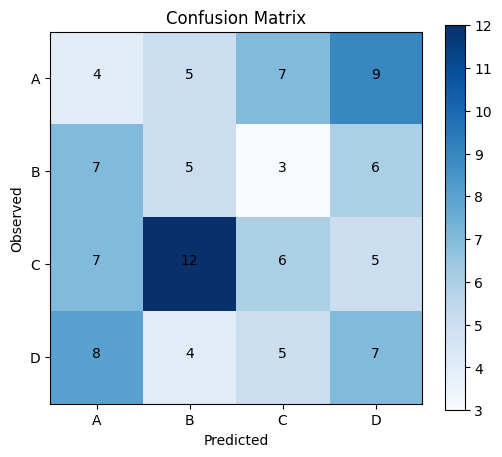

In [145]:
import numpy as np
import pandas as pd
import itertools
import scipy.stats as stats  # Corrected import
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Step 1: Simulate a 4-class dataset
np.random.seed(123)
classes = ["A", "B", "C", "D"]
observed = np.random.choice(classes, 100)  # True labels
predicted = np.random.choice(classes, 100)  # Predicted labels

# Create confusion matrix
cm = confusion_matrix(observed, predicted, labels=classes)
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

print("Confusion Matrix:")
print(cm_df)

# Step 2: Classification Report
print("\nClassification Report:")
print(classification_report(observed, predicted, target_names=classes))

# Step 3: Apply One-vs-All (OvA) approach
def epi_tests_ova(cm, target_class, class_labels):
    idx = class_labels.index(target_class)
    
    TP = cm[idx, idx]
    FP = sum(cm[idx, :]) - TP
    FN = sum(cm[:, idx]) - TP
    TN = cm.sum() - (TP + FP + FN)
    
    contingency_table = np.array([[TP, FP], [FN, TN]])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)  # Fixed function call
    
    return {"Class": target_class, "TP": TP, "FP": FP, "FN": FN, "TN": TN, "Chi2": chi2, "p-value": p}

# Apply epi_tests_ova for each class
results = [epi_tests_ova(cm, cls, classes) for cls in classes]

# Step 4: Convert Results into a Summary Table
summary_table = pd.DataFrame(results)

# Round numeric values
summary_table.iloc[:, 1:] = summary_table.iloc[:, 1:].apply(lambda x: np.round(x, 2))

print("\nSummary Table of Metrics:")
print(summary_table)

# Step 5: Export Results to CSV
summary_table.to_csv("multi_class_metrics.csv", index=False)

# Step 6: Plot Confusion Matrix
plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)

# Add text annotations
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="black")

plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.title("Confusion Matrix")
plt.show()
